Notation: $y_{i}$ is a scalar, and $x_{i}$ is a $K\times1$ vector. $Y$
is an $n\times 1$ vector, and $X$ is an $n\times K$ matrix.

Algebra of Least Squares
========================

OLS estimator
-------------

As we have learned from the linear project model, the parameter $\beta$
$$\begin{aligned}
y_{i} & =  x'_{i}\beta+e_{i}\\
E[x_{i}e_{i}] & =  0\end{aligned}$$ can be written as
$\beta=\left(E\left[x_{i}x_{i}'\right]\right)^{-1}E\left[x_{i}y_{i}\right].$

While population is something imaginary, in reality we possess a sample
of $n$ observations. We thus replace the population mean
$E\left[\cdot\right]$ by the sample mean, and the resulting estimator is
$$\widehat{\beta}=\left(\frac{1}{n}\sum_{i=1}^{n}x_{i}x_{i}'\right)^{-1}\frac{1}{n}\sum_{i=1}^{n}x_{i}y_{i}=\left(X'X\right)^{-1}X'y.$$
This is one way to motivate the OLS estimator.

In [1]:
n = 100
beta0 = c(1.0, 1.0, 0.0) 
X = cbind(rnorm(n), rpois(n, 3) )
e = rlogis(n) # the error term does not have to be normally distributed

y = cbind(1, X ) %*% beta0 + e # generate data
# in reality, we observe y and X but not e and beta0

Alternatively, we can derive the OLS estimator from minimizing the sum
of squared residuals
$$Q\left(\beta\right)=\sum_{i=1}^{n}\left(y_{i}-x_{i}'\beta\right)^{2}=\left(Y-X\beta\right)'\left(Y-X\beta\right).$$
By the first-order condition
$$\frac{\partial}{\partial\beta}Q\left(\beta\right)=-2X'\left(Y-X\beta\right),$$
the optimality condition gives exactly the same $\widehat{\beta}$.
Moreover, the second-order condition
$$\frac{\partial^{2}}{\partial\beta\partial\beta'}Q\left(\beta\right)=2X'X$$
shows that $Q\left(\beta\right)$ is convex in $\beta$.
($Q\left(\beta\right)$ is strictly convex in $\beta$ if $X'X$ is
positive definite.)

In [2]:
reg1 = lm( y ~ X ) # OLS regression
print(reg1)

X1 = cbind(1, X) # the first column of X is a constant
bhat = solve(t(X1)%*%X1, t(X1) %*% y )
print(bhat)


Call:
lm(formula = y ~ X)

Coefficients:
(Intercept)           X1           X2  
    0.84500      0.77722     -0.01699  

            [,1]
[1,]  0.84500343
[2,]  0.77722133
[3,] -0.01698568


Here we introduce some definitions and properties in OLS estimation.

-   Fitted value: $\widehat{Y}=X\widehat{\beta}$.

-   Projector: $P_{X}=X\left(X'X\right)^{-1}X$; Annihilator:
    $M_{X}=I_{n}-P_{X}$.

-   $P_{X}M_{X}=M_{X}P_{X}=0$.

-   If $AA=A$, we call it an idempotent matrix. Both $P_{X}$ and $M_{X}$
    are idempotent.

-   Residual:
    $\widehat{e}=Y-\widehat{Y}=Y-X\widehat{\beta}=M_{X}Y=M_{X}\left(X\beta+e\right)=M_{X}e$.

-   $X'\widehat{e}=XM_{X}e=0$.

-   $\frac{1}{n}\sum_{i=1}^{n}\widehat{e}_{i}=0$ if $x_{i}$ contains a
    constant.

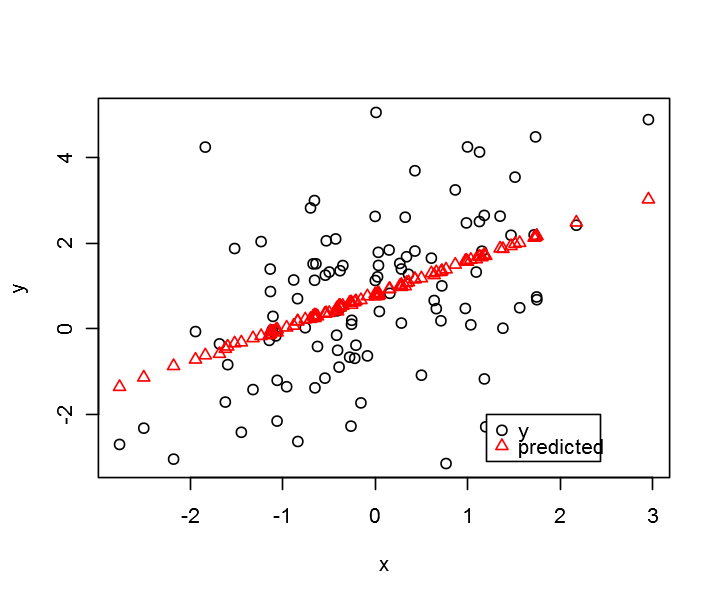

In [3]:
yhat = predict( reg1, data  = X ) # predicted value from the OLS regression
matplot( x = X[,1], y = cbind(y, yhat), pch = 1:2, xlab = "x", ylab = "y") # a graph between x1 and y and yhat

library(repr)
options(repr.plot.width=6, repr.plot.height=5)
legend(x = 1.2, y = -2, pch = 1:2, col = 1:2, legend = c("y", "predicted"))

In [4]:
# check the orthogonality of ehat and X1
ehat = y - X1 %*% bhat
print( t(X1) %*% ehat )

             [,1]
[1,] 4.218847e-15
[2,] 2.337195e-14
[3,] 0.000000e+00


In [5]:
cat("The mean of the residual is ", mean(ehat), "and the sum is", sum(ehat), "\nBut the mean of the true error term is", mean(e), "\n")

The mean of the residual is  3.008878e-17 and the sum is 3.01148e-15 
But the mean of the true error term is -0.18831 


**Real Data Example**

We check the relationship between *health status* and three control variables: *the number of doctor visits*, *the number of children in the household*, and
*access to health care*. 


In [6]:
library(Ecdat, quietly = TRUE, warn.conflicts = FALSE)

data(Doctor)
head(Doctor) # display the data structure


Attaching package: 'Ecfun'

The following object is masked from 'package:base':

    sign



doctor,children,access,health
0,1,0.50,0.495
1,3,0.17,0.520
0,4,0.42,-1.227
0,2,0.33,-1.524
11,1,0.67,0.173
3,1,0.25,-0.905


In [7]:
reg = lm(health ~ doctor + children + access, data = Doctor)
print(reg)


Call:
lm(formula = health ~ doctor + children + access, data = Doctor)

Coefficients:
(Intercept)       doctor     children       access  
   -0.02810      0.12059      0.03323     -0.63320  



In [8]:
summary(reg)


Call:
lm(formula = health ~ doctor + children + access, data = Doctor)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3370 -1.0085 -0.3261  0.6938  6.1266 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.02810    0.18281  -0.154    0.878    
doctor       0.12059    0.01884   6.399 3.71e-10 ***
children     0.03323    0.04771   0.697    0.486    
access      -0.63320    0.33724  -1.878    0.061 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.378 on 481 degrees of freedom
Multiple R-squared:  0.08221,	Adjusted R-squared:  0.07649 
F-statistic: 14.36 on 3 and 481 DF,  p-value: 5.628e-09


Goodness of Fit
---------------

The so-called R-square is the most popular measure of goodness-of-fit in
the linear regression. R-square is well defined only when a constant is
included in the regressors. Let
$M_{\iota}=I_{n}-\frac{1}{n}\iota\iota'$, where $\iota$ is an $n\times1$
vector of 1’s. $M_{\iota}$ is the *demeaner*, in the sense that
$M_{\iota}\left(z_{1},\ldots,z_{n}\right)'=\left(z_{1}-\overline{z},\ldots,z_{n}-\overline{z}\right)'$,
where $\bar{z}=\frac{1}{n}\sum_{i=1}^{n}z_{i}$. For any $X$, we can
decompose $Y=P_{X}Y+M_{X}Y=\widehat{Y}+\widehat{e}$. The total variation
is
$$Y'M_{\iota}Y=\left(\widehat{Y}+\widehat{e}\right)'M_{\iota}\left(\widehat{Y}+\widehat{e}\right)=\widehat{Y}'M_{\iota}\widehat{Y}+2\widehat{Y}'M_{\iota}\widehat{e}+\widehat{e}'M_{\iota}\widehat{e}=\widehat{Y}'M_{\iota}\widehat{Y}+\widehat{e}'\widehat{e}$$
where the last equality follows by $M_{\iota}\widehat{e}=\widehat{e}$ as
$\frac{1}{n}\sum_{i=1}^{n}\widehat{e}_{i}=0$, and
$\widehat{Y}'\widehat{e}=Y'P_{X}M_{X}e=0$. R-square is defined as
$\widehat{Y}'M_{\iota}\widehat{Y}/Y'M_{\iota}Y$.

Frish-Waugh-Lovell Theorem
--------------------------

The FWL theorem is an algebraic fact about the formula of a subvector
of the OLS estimator. To derive the FWL theorem We need to use the inverse of partitioned matrix.
For a positive definite symmetric matrix $A=\begin{pmatrix}A_{11} & A_{12}\\
A_{12}' & A_{22}
\end{pmatrix}$, the inverse can be written as 
$$
A^{-1}=\begin{pmatrix}\left(A_{11}-A_{12}A_{22}^{-1}A_{12}'\right)^{-1} & -\left(A_{11}-A_{12}A_{22}^{-1}A_{12}'\right)^{-1}A_{12}A_{22}^{-1}\\
-A_{22}^{-1}A_{12}'\left(A_{11}-A_{12}A_{22}^{-1}A_{12}'\right)^{-1} & \left(A_{22}-A_{12}'A_{11}^{-1}A_{12}\right)^{-1}
\end{pmatrix}.
$$
In our context of OLS estimator, 
\begin{align*}
\widehat{\beta} & =\begin{pmatrix}\widehat{\beta}_{1}\\
\widehat{\beta}_{2}
\end{pmatrix}=\begin{pmatrix}X_{1}'X_{1} & X_{1}'X_{2}\\
X_{2}'X_{1} & X_{2}'X_{2}
\end{pmatrix}^{-1}\begin{pmatrix}X_{1}y\\
X_{2}y
\end{pmatrix}\\
 & =\begin{pmatrix}\left(X_{1}M_{X_{2}}'X_{1}\right)^{-1} & -\left(X_{1}M_{X_{2}}'X_{1}\right)^{-1}X_{1}'X_{2}\left(X_{2}'X_{2}\right)^{-1}\\
\cdot & \cdot
\end{pmatrix}\begin{pmatrix}X_{1}y\\
X_{2}y
\end{pmatrix}.
\end{align*}
The subvector
\begin{align*}
\widehat{\beta}_{1} & =\left(X_{1}M_{X_{2}}'X_{1}\right)^{-1}X_{1}y-\left(X_{1}M_{X_{2}}'X_{1}\right)^{-1}X_{1}'X_{2}\left(X_{2}'X_{2}\right)^{-1}X_{2}y\\
 & =\left(X_{1}M_{X_{2}}'X_{1}\right)^{-1}\left(X_{1}y-X_{1}'P_{X_{2}}y\right)\\
 & =\left(X_{1}M_{X_{2}}'X_{1}\right)^{-1}X_{1}M_{X_{2}}y.
\end{align*}

Similar derivation can also be carried out in the population linear
projection. See Hansen's Chapter 2.21-23.

In [9]:
X2 = X1[,1:2]
PX2 = X2 %*% solve( t(X2) %*% X2) %*% t(X2)
MX2 = diag(rep(1,n)) - PX2

X3 = X1[,3]

bhat3 =  solve(t(X3)%*% MX2 %*% X3, t(X3) %*% MX2 %*% y )
print(bhat3)

            [,1]
[1,] -0.01698568


Statistical Properties of Least Squares
=======================================

To talk about the statistical properties in finite sample, we impose the
following assumptions.

1.  The data $\left(y_{i},x_{i}\right)_{i=1}^{n}$ is a random sample
    from the same data generating process $y_{i}=x_{i}'\beta+e_{i}$.

2.  $e_{i}|x_{i}\sim N\left(0,\sigma^{2}\right)$.

Maximum Likelihood Estimation
-----------------------------------

Under the normality assumption,
$y_{i}|x_{i}\sim N\left(x_{i}'\beta,\gamma\right)$, where
$\gamma=\sigma^{2}$. The *conditional* likelihood of observing a sample
$\left(y_{i},x_{i}\right)_{i=1}^{n}$ is
$$\prod_{i=1}^{n}\frac{1}{\sqrt{2\pi\gamma}}\exp\left(-\frac{1}{2\gamma}\left(y_{i}-x_{i}'\beta\right)^{2}\right),$$
and the (conditional) log-likelihood function is
$$L\left(\beta,\gamma\right)=-\frac{n}{2}\log2\pi-\frac{n}{2}\log\gamma-\frac{1}{2\gamma}\sum_{i=1}^{n}\left(y_{i}-x_{i}'\beta\right)^{2}.$$
Therefore, the maximum likelihood estimator (MLE) coincides with the OLS
estimator, and
$\widehat{\gamma}_{\mathrm{MLE}}=\widehat{e}'\widehat{e}/n$.

Finite Sample Distribution
--------------------------

We can show the finite-sample exact distribution of $\widehat{\beta}$.
*Finite sample distribution* means that the distribution holds for any
$n$; it is in contrast to *asymptotic distribution*, which is a large sample
approximation to the finite sample distribution.

Since
$$\widehat{\beta}=\left(X'X\right)^{-1}X'y=\left(X'X\right)^{-1}X'\left(X'\beta+e\right)=\beta+\left(X'X\right)^{-1}X'e,$$
we have the estimator
$\widehat{\beta}|X\sim N\left(\beta,\sigma^{2}\left(X'X\right)^{-1}\right)$,
and
$$\widehat{\beta}_{k}|X\sim N\left(\beta_{k},\sigma^{2}\eta_{k}'\left(X'X\right)^{-1}\eta_{k}\right)\sim N\left(\beta_{k},\sigma^{2}\left(X'X\right)_{kk}^{-1}\right),$$
where $\eta_{k}=\left(1\left\{ l=k\right\} \right)_{l=1,\ldots,K}$ is
the selector of the $k$-th element.

In reality, $\sigma^{2}$ is an unknown parameter, and
$$s^{2}=\widehat{e}'\widehat{e}/\left(n-K\right)=e'M_{X}e/\left(n-K\right)$$
is an unbiased estimator of $\sigma^{2}$. Consider the $T$-statistic
$$T_{k}=\frac{\widehat{\beta}_{k}-\beta_{k}}{\sqrt{s^{2}\left[\left(X'X\right)^{-1}\right]_{kk}}}=\frac{\left(\widehat{\beta}_{k}-\beta_{k}\right)/\sqrt{\sigma^{2}\left[\left(X'X\right)^{-1}\right]_{kk}}}{\sqrt{\frac{e'}{\sigma}M_{X}\frac{e}{\sigma}/\left(n-K\right)}}.$$
The numerator follows a standard normal, and the denominator follows
$\frac{1}{n-K}\chi^{2}\left(n-K\right)$. Moreover, the numerator and the
denominator are independent. As a result, $T_{k}\sim t\left(n-K\right)$.

Mean and Variance
-----------------

Now we relax the normality assumption and statistical independence.
Instead, we assume a regression model $y_{i} =  x_{i}'\beta+e_{i}$ and 
$$\begin{aligned}
E[e_{i}|x_{i}] & =  0 \\
E\left[e_{i}^{2}|x_{i}\right] & =  \sigma^{2}.
\end{aligned}$$
where the first condition is the *mean independence* assumption, and
the second condition is the *homoskedasticity* assumption.

**Example**
(Heteroskedasticity) If $e_{i}=x_{i}u_{i}$, where $x_{i}$ is a scalar
random variable, $u_{i}$ is independent of $x_{i}$,
$E\left[u_{i}\right]=0$ and $E\left[u_{i}^{2}\right]=\sigma^{2}$. Then
$E\left[e_{i}|x_{i}\right]=0$ but
$E\left[e_{i}^{2}|x_{i}\right]=\sigma_{i}^{2}x_{i}^{2}$ is a function of
$x_{i}$. We say $e_{i}^{2}$ is a heteroskedastic error.

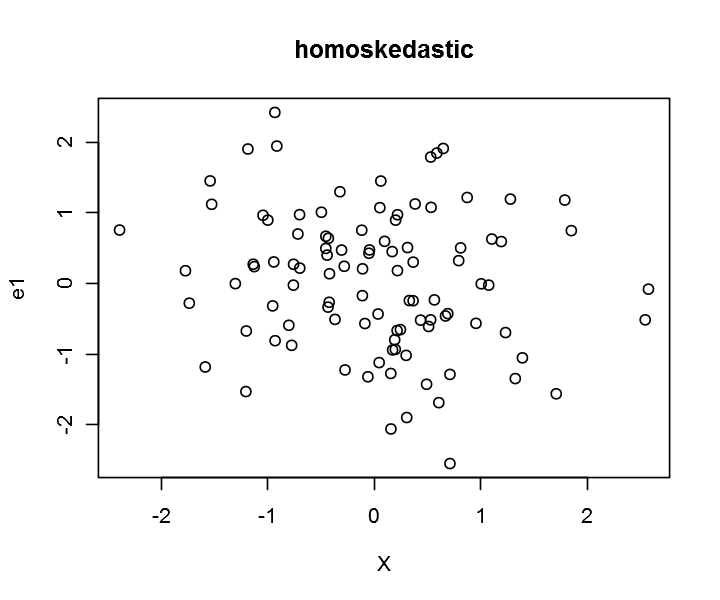

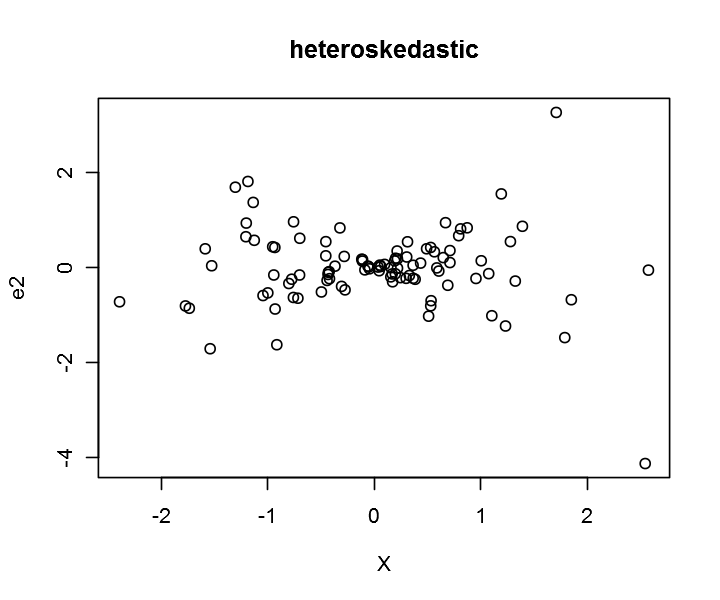

In [10]:
n = 100
X = rnorm(n)

e1 = rnorm(n)
plot( y = e1, x = X, main = "homoskedastic")

e2 = X * rnorm(n)  # the source of heteroskedasticity
plot( y = e2, x = X,  main = "heteroskedastic")

These assumptions are about the first and second moment of $e_{i}$
conditional on $x_{i}$. Unlike the normality assumption, they do not
restrict the entire distribution of $e_{i}$.

-   Unbiasedness:
    $$E\left[\widehat{\beta}|X\right]=E\left[\left(X'X\right)^{-1}XY|X\right]=E\left[\left(X'X\right)^{-1}X\left(X'\beta+e\right)|X\right]=\beta.$$
    Unbiasedness does not rely on homoskedasticity.

-   Variance: $$\begin{aligned}
    \mathrm{var}\left(\widehat{\beta}|X\right) & =  E\left[\left(\widehat{\beta}-E\widehat{\beta}\right)\left(\widehat{\beta}-E\widehat{\beta}\right)'|X\right]\\
     & =  E\left[\left(\widehat{\beta}-\beta\right)\left(\widehat{\beta}-\beta\right)'|X\right]\\
     & =  E\left[\left(X'X\right)^{-1}X'ee'X\left(X'X\right)^{-1}|X\right]\\
     & =  \left(X'X\right)^{-1}X'E\left[ee'|X\right]X\left(X'X\right)^{-1}\\
     & =  \left(X'X\right)^{-1}X'\left(\sigma^{2}I_{n}\right)X\left(X'X\right)^{-1}\\
     & =  \sigma^{2}\left(X'X\right)^{-1}.\end{aligned}$$

Gauss-Markov Theorem
--------------------------

Gauss-Markov theorem justifies the OLS estimator as the efficient
estimator among all linear unbiased ones. *Efficient* here means that it
enjoys the smallest variance in a family of estimators.

There are numerous linearly unbiased estimators. For example,
$\left(Z'X\right)^{-1}Z'y$ for $z_{i}=x_{i}^{2}$ is unbiased because
$E\left[\left(Z'X\right)^{-1}Z'y\right]=E\left[\left(Z'X\right)^{-1}Z'\left(X\beta+e\right)\right]=\beta$.

Let $\tilde{\beta}=A'y$ be a generic linear estimator, where $A$ is any
$n\times K$ functions of $X$. As
$$E\left[A'y|X\right]=E\left[A'\left(X\beta+e\right)|X\right]=A'X\beta.$$
So the linearity and unbiasedness of $\tilde{\beta}$ implies
$A'X=I_{n}$. Moreover, the variance
$$\mbox{var}\left(A'y|X\right)=E\left[\left(A'y-\beta\right)\left(A'y-\beta\right)'|X\right]=E\left[A'ee'A|X\right]=\sigma^{2}A'A.$$
Let $C=A-X\left(X'X\right)^{-1}.$ 
$$\begin{aligned}
A'A-\left(X'X\right)^{-1} 
 & =  \left(C+X\left(X'X\right)^{-1}\right)'\left(C+X\left(X'X\right)^{-1}\right)-\left(X'X\right)^{-1}\\
 & =  C'C+\left(X'X\right)^{-1}X'C+C'X\left(X'X\right)^{-1} \\
 & =C'C,
 \end{aligned}$$
where the last equality follows as
$$\left(X'X\right)^{-1}X'C=\left(X'X\right)^{-1}X'\left(A-X\left(X'X\right)^{-1}\right)=\left(X'X\right)^{-1}-\left(X'X\right)^{-1}=0.$$
Therefore $A'A-\left(X'X\right)^{-1}$ is a positive semi-definite
matrix. The variance of any $\tilde{\beta}$ is no smaller than the OLS
estimator $\widehat{\beta}$.

Homoskedasticity is a restrictive assumption. Under homoskedasticity,
$\mathrm{var}\left(\widehat{\beta}\right)=\sigma^{2}\left(X'X\right)^{-1}$.
Popular estimator of $\sigma^{2}$ is the sample mean of the residuals
$\widehat{\sigma}^{2}=\frac{1}{n}\widehat{e}'\widehat{e}$ or the
unbiased one $s^{2}=\frac{1}{n-K}\widehat{e}'\widehat{e}$. Under
heteroskedasticity, Gauss-Markov theorem does not apply.